# Loading data sets:

In [3]:
import pandas as pd
import numpy as np

In [4]:
comments= pd.read_csv("C:/Users/DELL/OneDrive/Documents/GitHub/PPPD201920_Students_MAT/PracaDomowa/PracaDomowa 5/comments.csv")
posts   = pd.read_csv("C:/Users/DELL/OneDrive/Documents/GitHub/PPPD201920_Students_MAT/PracaDomowa/PracaDomowa 5/posts.csv")
users   = pd.read_csv("C:/Users/DELL/OneDrive/Documents/GitHub/PPPD201920_Students_MAT/PracaDomowa/PracaDomowa 5/users.csv")

## Task 1:
### Draw a histogram of the number *Comments* on the posts.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012F12F5D7B8>]],
      dtype=object)

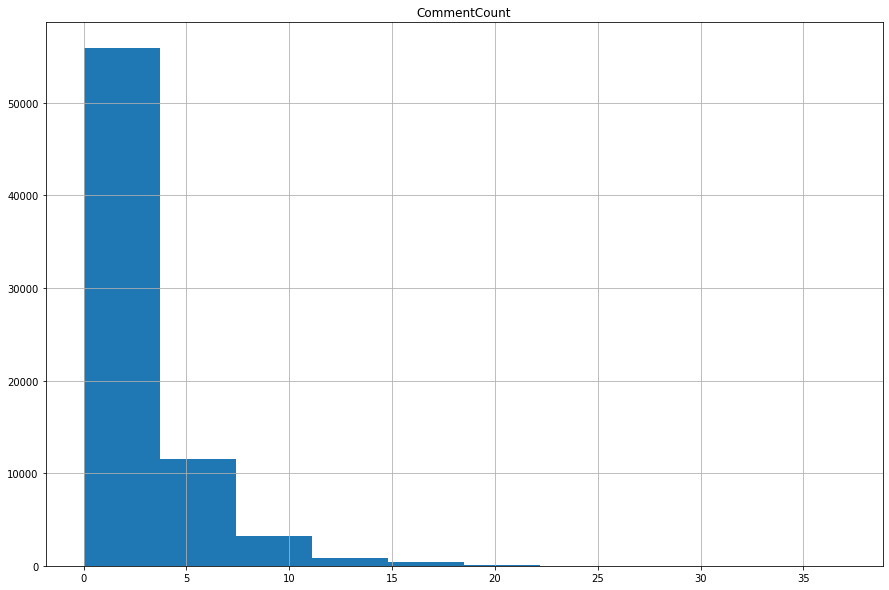

In [6]:
posts.hist('CommentCount',figsize=(15,10))

## Task 2

### Output the name (DisplayName, not Id!) of the user who has the highest total number of views for his posts. Tip: To extract the appropriate OwnerUserId from Posts you can use .loc, .iloc or .values.

In [7]:
posts.sort_values(by="ViewCount",ascending=False)\
     .head(1)\
     .reset_index()[["OwnerUserId","ViewCount"]]

,OwnerUserId,ViewCount
0,22716.0,297231.0


In [8]:
users.loc[users["Id"]==22716]\
     .reset_index()[["DisplayName"]]
# The answer is: "Shalom"

,DisplayName
0,Shalom


## Task 3

### Display the name of the user who has the second highest number of Comments marked as Accepted Solution.

#### As I understand, the comment is accepted when it has the score (in data set: comments) greater than 0; and the AcceptedAnswerId in dataframe Posts is something different.

In [9]:
comments.loc[comments["Score"]>0]\
        .groupby(["UserId"])\
        .count()\
        .sort_values(by="Id",ascending=False).head(2)

# So the answer is that, user has userid = 19400 has the second highest number of accepted comments.

,CreationDate,Id,PostId,Score
UserId,,,,
6669.0,2123,2123,2123,2123
19400.0,2039,2039,2039,2039


In [10]:
users[users["Id"]==19400][["DisplayName"]]
# So the answer is "phoog", not "Vedant Chandra".

,DisplayName
11696,phoog


## Task 4:
### Display the percentage of posts for which the accepted answer having lower score than the answer with the highest score.

#### With the same understanding that the accepted comments is the comments with score >0. 

In [11]:
# Finding the comment with highest score from data frame (comments)
comments.sort_values(by="Score",ascending=False)\
        .head(1)[["Score"]]

# So the comment with highest score is 207

,Score
152870,207


In [18]:
# Finding the number of Post (by data frame: comments (from my understanding, in stead of posts))
comments["PostId"].nunique()

# Hence, we have: 42454 posts in total.

42454

In [130]:
# Finding the id numbers of posts that having accepted comments (from posts)
vector= posts.dropna(subset=["AcceptedAnswerId"]).reset_index().Id
vector
# The ids of posts having accepted comments is saved into vector

0             1
1             5
2             6
3             8
4             9
5            10
6            11
7            13
8            16
9            25
10           26
11           27
12           28
13           34
14           41
15           47
16           66
17           69
18           73
19           77
20           78
21           79
22           84
23           85
24           86
25           89
26           93
27          100
28          102
29          105
          ...  
11458    100551
11459    100552
11460    100570
11461    100584
11462    100604
11463    100619
11464    100630
11465    100661
11466    100668
11467    100678
11468    100685
11469    100691
11470    100692
11471    100703
11472    100716
11473    100736
11474    100737
11475    100754
11476    100767
11477    100789
11478    100796
11479    100823
11480    100846
11481    100875
11482    100878
11483    100885
11484    100912
11485    100915
11486    100917
11487    100925
Name: Id, Length: 11488,

In [126]:
# Finding the number of posts which have accepted comments possessing lower score than the answer with the highest score (207)

df= comments[comments["PostId"].isin(vector)].groupby("PostId").max()
df

,CreationDate,Id,Score,UserId
PostId,,,,
1,2011-06-24T05:07:16.643,282,3,65.0
6,2014-12-08T06:54:47.087,72288,3,23118.0
8,2016-11-12T22:27:48.293,191313,0,13971.0
9,2011-06-21T21:18:09.577,645,1,22.0
10,2015-11-04T14:43:45.267,119507,66,26899.0
11,2011-07-08T12:16:44.360,885,0,248.0
13,2011-08-18T08:17:39.573,1826,3,140.0
16,2015-11-28T00:00:00.113,122426,0,12555.0
25,2011-08-01T05:07:54.427,27882,1,537.0


In [124]:
df.loc[df.Score <207].shape[0]
# So, there are 8504 posts over 

8504

In [19]:
# Finally, the percentage of posts for which the accepted answer having lower score than the answer with the highest score:

8504/42454*100

# Result is ~ 20.03%

20.03109247656287